<a href="https://colab.research.google.com/github/Tatutina/HeartDisease_Project/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Машинное обучение

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind, shapiro

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    confusion_matrix, multilabel_confusion_matrix, f1_score, roc_auc_score,
    roc_curve, average_precision_score, precision_recall_curve
)

from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import  (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
)

In [77]:
heart_new1=pd.read_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_clean.csv')

In [78]:
heart_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ЛПНП                                     405 non-null    float64
 1   Возраст алког                            371 non-null    float64
 2   Работа                                   405 non-null    int64  
 3   Пассивное курение                        405 non-null    int64  
 4   Переломы                                 405 non-null    int64  
 5   ЛПВП                                     405 non-null    float64
 6   Выход на пенсию                          405 non-null    int64  
 7   Холестерин                               405 non-null    float64
 8   Артериальная гипертония                  405 non-null    int64  
 9   Триглицериды                             405 non-null    float64
 10  Гепатит                                  405 non-n

In [79]:
heart_new1.head()

,ЛПНП,Возраст алког,Работа,Пассивное курение,Переломы,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Алкоголь_ранее употреблял,Алкоголь_употребляю в настоящее время,Национальность_0,Национальность_1,Национальность_2,Национальность_3,Профессия_0,Профессия_1,Профессия_2,Профессия_3
0,2.79,18.0,1,0,0,0.97,0,4.0,0,0.52,...,0.0,1.0,0,0,0,1,0,0,0,1
1,2.74,13.0,1,1,0,0.68,0,4.9,1,3.25,...,0.0,1.0,0,0,0,1,0,0,0,1
2,5.37,12.0,0,1,0,0.57,1,7.8,1,4.09,...,0.0,1.0,0,0,1,0,0,0,0,1
3,3.77,22.0,0,0,1,0.91,1,4.9,0,0.49,...,0.0,1.0,0,0,0,1,0,0,0,1
4,2.42,16.0,0,0,1,1.55,0,4.2,0,0.50,...,0.0,1.0,0,0,0,1,0,0,1,0


In [95]:
heart_new = heart_new1.drop(['Семья', 'Возраст алког'], axis=1)

* Разобьём датасет на данные для обучения и тестирования методом **train_test_split** библиотеки **Scikit-learn**

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart_new.drop("ССЗ", axis=1),
    heart_new["ССЗ"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=heart_new["ССЗ"]
)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 43), (81, 43), (324,), (81,))

## Метрики качества для задач классификации: точность и специфичность, F1, ROC AUC, PR AUC

In [83]:
def calculate_specificity(true_labels, predictions):
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp)).round(4)
    return specif, (tn, fp, fn, tp)

In [84]:
  def get_all_metrics(
    true_labels,
    predictions,
    probabilities,
    print_metrics=False,
    **kwargs
):

    kwargs_roc_auc = dict()

    probabilities = probabilities[:, 1]


    accuracy = accuracy_score(true_labels, predictions)
    balanced_accuracy=balanced_accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    roc_auc = roc_auc_score(true_labels, probabilities,**kwargs_roc_auc)
    pr_auc = average_precision_score(true_labels, predictions)

    specificity, conf_matrix = calculate_specificity(true_labels, predictions)


    tn, fp, fn, tp = conf_matrix

    print(
            "Accuracy = {:.4f}\nBalanced_accuracy = {:.4f}\nPrecision = {:.4f}\nRecall = {:.4f}\nF1_score = {:.4f}\nROC AUC = {:.4f}\nPR AUC = {:.4f}\nSpecificity = {:.4f}".format(
                accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity
            )
        )


    return {
        "Accuracy": accuracy,
        "Balanced accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Specificity": specificity
    }

In [85]:
def model_train_test(X_train, y_train, X_test, y_test, model, **kwargs):

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)

    if isinstance(model, LogisticRegression):
        importance = model.coef_[0]
    elif isinstance(model, DecisionTreeClassifier):
        importance = model.feature_importances_
    else:
         importance = None

    print(str(model), end="\n\n")

    all_metrics = get_all_metrics(
        y_test,
        pred,
        proba,
        print_metrics=True,
        **kwargs,
    )
    return pred, proba, importance, all_metrics

## Сравнение алгоритмов  

In [86]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    LogisticRegression(random_state=42, max_iter=1000)
)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy = 0.9383
Balanced_accuracy = 0.9403
Precision = 0.9750
Recall = 0.9070
F1_score = 0.9398
ROC AUC = 0.9945
PR AUC = 0.9337
Specificity = 0.9737


In [87]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.9877
Balanced_accuracy = 0.9884
Precision = 1.0000
Recall = 0.9767
F1_score = 0.9882
ROC AUC = 0.9884
PR AUC = 0.9891
Specificity = 1.0000


In [88]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.9259
Balanced_accuracy = 0.9302
Precision = 1.0000
Recall = 0.8605
F1_score = 0.9250
ROC AUC = 0.9979
PR AUC = 0.9345
Specificity = 1.0000


## Матрицы ошибок

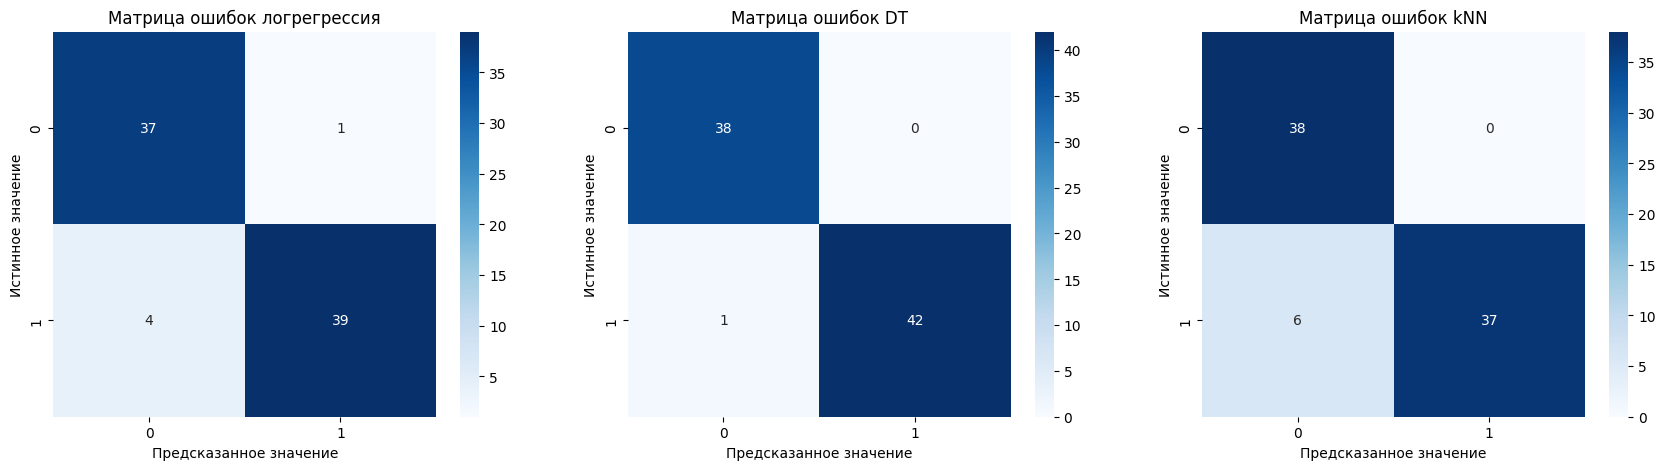

In [89]:
#Строим матрицу ошибок для модели
confus_matrix = metrics.confusion_matrix(y_test, pred_logreg)
confus_matrix1 = metrics.confusion_matrix(y_test, pred_dt)
confus_matrix2 = metrics.confusion_matrix(y_test, pred_knn)

fig, axes = plt.subplots(1, 3, figsize=(21, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Матрица ошибок логрегрессия')
axes[0].set_xlabel('Предсказанное значение')
axes[0].set_ylabel('Истинное значение')

sns.heatmap(confus_matrix1, annot=True, fmt='', cmap='Blues', ax=axes[1])
axes[1].set_title('Матрица ошибок DT')
axes[1].set_xlabel('Предсказанное значение')
axes[1].set_ylabel('Истинное значение')

sns.heatmap(confus_matrix2, annot=True, fmt='', cmap='Blues', ax=axes[2])
axes[2].set_title('Матрица ошибок kNN')
axes[2].set_xlabel('Предсказанное значение')
axes[2].set_ylabel('Истинное значение');

In [90]:
def plot_roc_pr_curves(true_labels, algorithms):

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_title("ROC-кривая", fontsize=20)
    ax[1].set_title("PR-кривая", fontsize=20)

    for alg_name, probabilities in algorithms.items():
        fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])
        precisions, recalls, _ = precision_recall_curve(true_labels, probabilities[:, 1])

        ax[0].plot(
            fpr,
            tpr,
            label="{} (ROC AUC = {})".format(
                alg_name,
                round(
                    roc_auc_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )
        ax[1].plot(
            recalls,
            precisions,
            label="{} (PR AUC = {})".format(
                alg_name,
                round(
                    average_precision_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )

    ax[0].legend(fontsize=14)
    ax[0].set_xlabel("Ложноположительные", fontsize=16)
    ax[0].set_ylabel("Истинно положительные", fontsize=16)

    ax[1].legend(fontsize=14)
    ax[1].set_xlabel("Recall", fontsize=16)
    ax[1].set_ylabel("Precision", fontsize=16)
    plt.show()

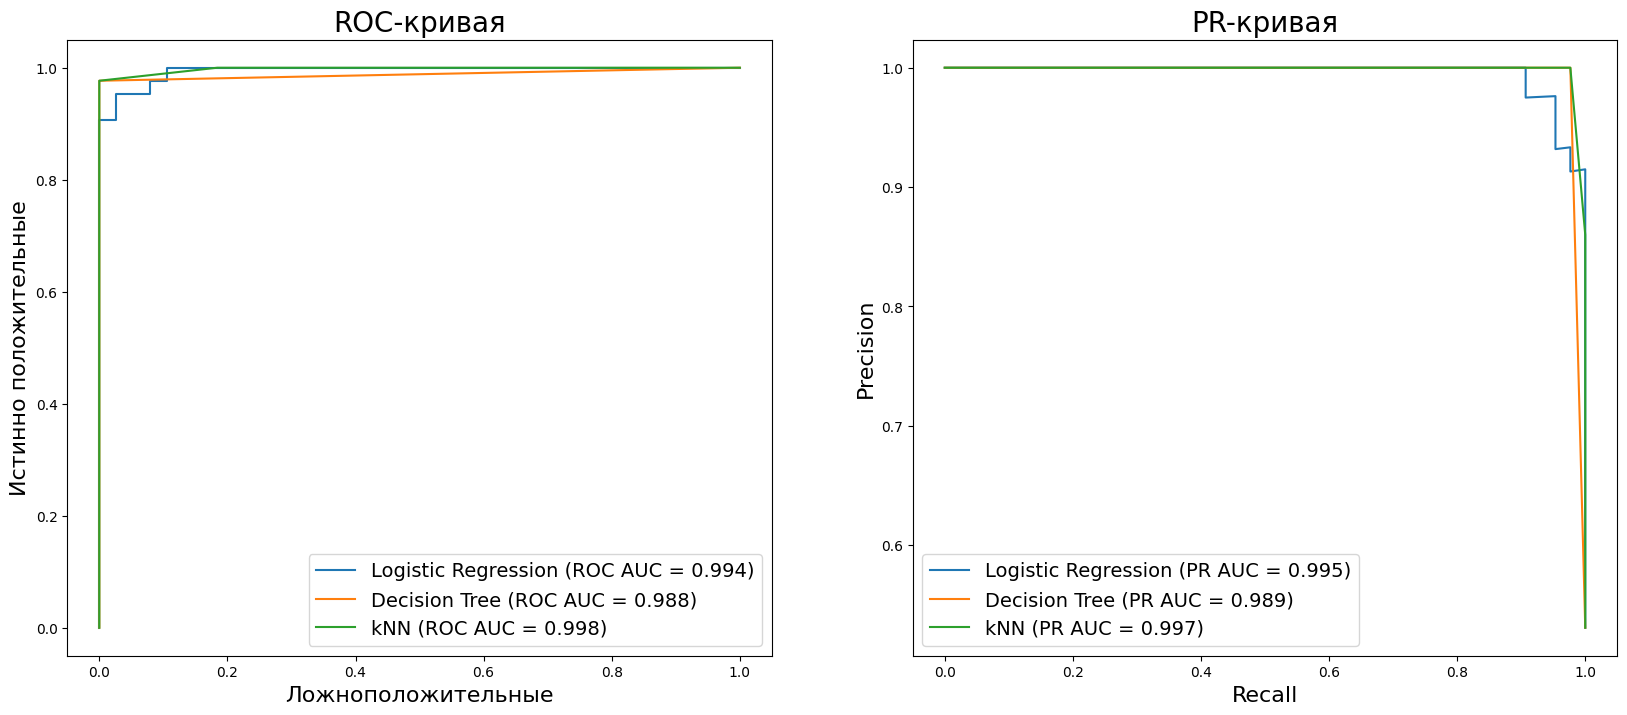

In [91]:
plot_roc_pr_curves(
    y_test,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
    }
)

* Сагрегируем все метрики моделей

In [92]:
ans_df = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn],
    index=["Logistic Regression", "Decision Tree", "kNN"]
)
ans_df

,Accuracy,Balanced accuracy,Precision,Recall,F1_score,ROC AUC,PR AUC,Specificity
Logistic Regression,0.938272,0.940330,0.975,0.906977,0.939759,0.994492,0.933685,0.9737
Decision Tree,0.987654,0.988372,1.000,0.976744,0.988235,0.988372,0.989090,1.0000
kNN,0.925926,0.930233,1.000,0.860465,0.925000,0.997858,0.934539,1.0000


In [93]:
for metric in ans_df.columns:
    sorted_ans_df = ans_df.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df.index.tolist()
        )
    )

Accuracy:            ['Decision Tree', 'Logistic Regression', 'kNN']
Balanced accuracy:   ['Decision Tree', 'Logistic Regression', 'kNN']
Precision:           ['Decision Tree', 'kNN', 'Logistic Regression']
Recall:              ['Decision Tree', 'Logistic Regression', 'kNN']
F1_score:            ['Decision Tree', 'Logistic Regression', 'kNN']
ROC AUC:             ['kNN', 'Logistic Regression', 'Decision Tree']
PR AUC:              ['Decision Tree', 'kNN', 'Logistic Regression']
Specificity:         ['Decision Tree', 'kNN', 'Logistic Regression']


##Подбор гиперпараметров с последующей оценкой

In [96]:
# 1. БАЗОВАЯ МОДЕЛЬ (до оптимизации)

raw_table_data = pd.read_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_clean.csv')
raw_table_data = raw_table_data.drop(['Семья', 'Возраст алког'], axis=1)
X = raw_table_data.drop(['ССЗ'], axis=1)
y = raw_table_data['ССЗ'].values
raw_table_data_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Отбор признаков: SelectKBest с f_classif, k = 10 (можно подобрать, но для примера — 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
model = LogisticRegression(C=0.0001, penalty='l2',solver='liblinear',class_weight=None,random_state=42, max_iter=1000)
model.fit(X_train_selected, y_train)

y_pred_base = model.predict(X_test_selected)
y_proba_base = model.predict_proba(X_test_selected)
print("\n--- Метрики ДО оптимизации ---")
metrics_before = get_all_metrics(y_test, y_pred_base, y_proba_base,
                 print_metrics=True, average='binary')


# 2. ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ
param_grid = {'C': [0.005, 0.001, 0.1, 0.5, 1, 5, 10, 50, 100],'penalty': ['l1', 'l2'],
             'solver': ['liblinear', 'saga']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
    param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# 3. МЕТРИКИ ПОСЛЕ ОПТИМИЗАЦИИ
print("\n--- Метрики ПОСЛЕ оптимизации ---")
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test_selected)
y_proba_opt = best_model.predict_proba(X_test_selected)

metrics_after = get_all_metrics(y_test, y_pred_opt, y_proba_opt,
                print_metrics=True)


# 4. СРАВНЕНИЕ (опционально красиво)
print("\n" + "="*50)
print("СРАВНЕНИЕ МЕТРИК: ДО → ПОСЛЕ")
print("="*50)
for metric in metrics_before:
    before = metrics_before[metric]
    after = metrics_after[metric]
    sign = "↑" if after > before else "↓" if after < before else "="
    print(f"{metric:<20}: {before:.4f} → {after:.4f} {sign}")


--- Метрики ДО оптимизации ---
Accuracy = 0.9136
Balanced_accuracy = 0.9186
Precision = 1.0000
Recall = 0.8372
F1_score = 0.9114
ROC AUC = 0.9486
PR AUC = 0.9236
Specificity = 1.0000

--- Метрики ПОСЛЕ оптимизации ---
Accuracy = 0.9136
Balanced_accuracy = 0.9171
Precision = 0.9737
Recall = 0.8605
F1_score = 0.9136
ROC AUC = 0.9486
PR AUC = 0.9119
Specificity = 0.9737

СРАВНЕНИЕ МЕТРИК: ДО → ПОСЛЕ
Accuracy            : 0.9136 → 0.9136 =
Balanced accuracy   : 0.9186 → 0.9171 ↓
Precision           : 1.0000 → 0.9737 ↓
Recall              : 0.8372 → 0.8605 ↑
F1_score            : 0.9114 → 0.9136 ↑
ROC AUC             : 0.9486 → 0.9486 =
PR AUC              : 0.9236 → 0.9119 ↓
Specificity         : 1.0000 → 0.9737 ↓


## Вклад признаков в предсказание

* Метод, который упорядочивает и визуализирует коэффициенты регрессии для каждого признака

In [97]:
def plot_imp(ssz, importance):
    order = np.argsort(importance)
    ssz = ssz[order]
    importance = importance[order]

    for idx, val in enumerate(importance):
        print(f'{ssz[idx]:40} {val:.4f}')
    plt.figure(figsize=(4, np.ceil(len(ssz) / 4)))

    plt.barh(ssz, importance)
    plt.show()

In [98]:
heart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ЛПНП                                     405 non-null    float64
 1   Работа                                   405 non-null    int64  
 2   Пассивное курение                        405 non-null    int64  
 3   Переломы                                 405 non-null    int64  
 4   ЛПВП                                     405 non-null    float64
 5   Выход на пенсию                          405 non-null    int64  
 6   Холестерин                               405 non-null    float64
 7   Артериальная гипертония                  405 non-null    int64  
 8   Триглицериды                             405 non-null    float64
 9   Гепатит                                  405 non-null    int64  
 10  Сахарный диабет                          405 non-n

In [99]:
heart_new.drop("ССЗ", axis=1, inplace=True)

Образование                              -0.6846
Религия_Христианство                     -0.5398
Статус Курения_Курит                     -0.4834
Частота пасс кур_nan                     -0.3682
Частота пасс кур_не менее 1 раза в день  -0.3434
Частота пасс кур_2-3 раза в день         -0.2949
Профессия_3                              -0.2421
Профессия_1                              -0.2358
Гепатит                                  -0.1910
Травмы за год                            -0.1414
Религия_Нет                              -0.1304
Национальность_2                         -0.1286
Религия_Ислам                            -0.1210
Профессия_2                              -0.1105
Национальность_1                         -0.0446
Сон после обеда                          -0.0440
Частота пасс кур_4 и более раз в день    -0.0398
Хроническое заболевание легких           -0.0348
Переломы                                 -0.0342
Национальность_0                         0.0300
Возраст курения      

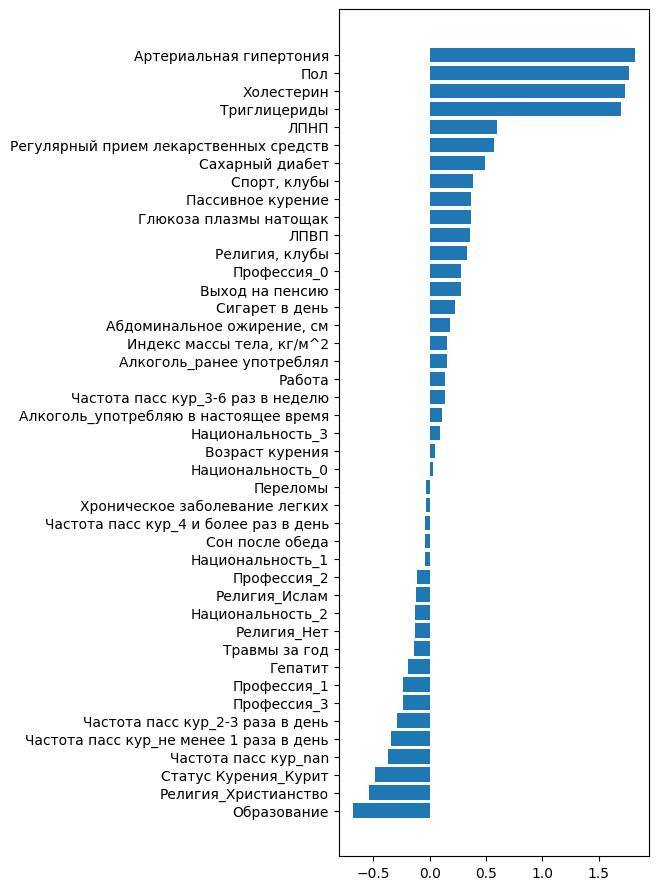

In [100]:
ssz = heart_new.columns
plot_imp(ssz, importance_logreg)

* Выведем абсолютный вклад признаков в предсказание

Национальность_0                         0.0300
Переломы                                 0.0342
Хроническое заболевание легких           0.0348
Частота пасс кур_4 и более раз в день    0.0398
Возраст курения                          0.0439
Сон после обеда                          0.0440
Национальность_1                         0.0446
Национальность_3                         0.0878
Алкоголь_употребляю в настоящее время    0.1047
Профессия_2                              0.1105
Религия_Ислам                            0.1210
Национальность_2                         0.1286
Религия_Нет                              0.1304
Частота пасс кур_3-6 раз в неделю        0.1327
Работа                                   0.1389
Травмы за год                            0.1414
Алкоголь_ранее употреблял                0.1497
Индекс массы тела, кг/м^2                0.1568
Абдоминальное ожирение, см               0.1839
Гепатит                                  0.1910
Сигарет в день                          

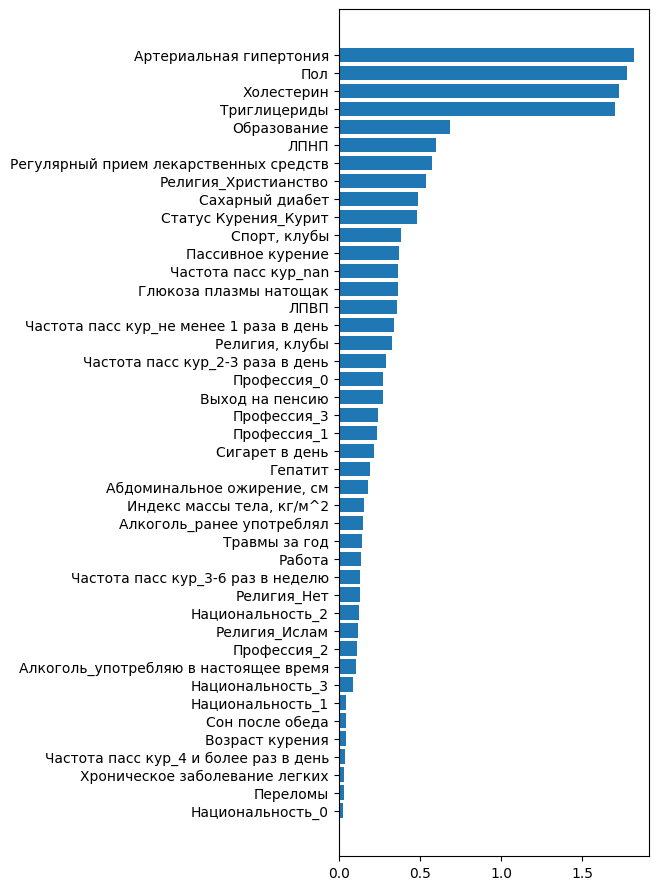

In [101]:
plot_imp(ssz, np.abs(importance_logreg))

Важность признаков, полученная с помощью Деревьев решений

ЛПНП                                     0.0000
Работа                                   0.0000
Пассивное курение                        0.0000
Переломы                                 0.0000
ЛПВП                                     0.0000
Выход на пенсию                          0.0000
Гепатит                                  0.0000
Триглицериды                             0.0000
Спорт, клубы                             0.0000
Религия, клубы                           0.0000
Сахарный диабет                          0.0000
Пол                                      0.0000
Травмы за год                            0.0000
Сон после обеда                          0.0000
Глюкоза плазмы натощак                   0.0000
Регулярный прием лекарственных средств   0.0000
Частота пасс кур_nan                     0.0000
Религия_Ислам                            0.0000
Частота пасс кур_4 и более раз в день    0.0000
Хроническое заболевание легких           0.0000
Индекс массы тела, кг/м^2               

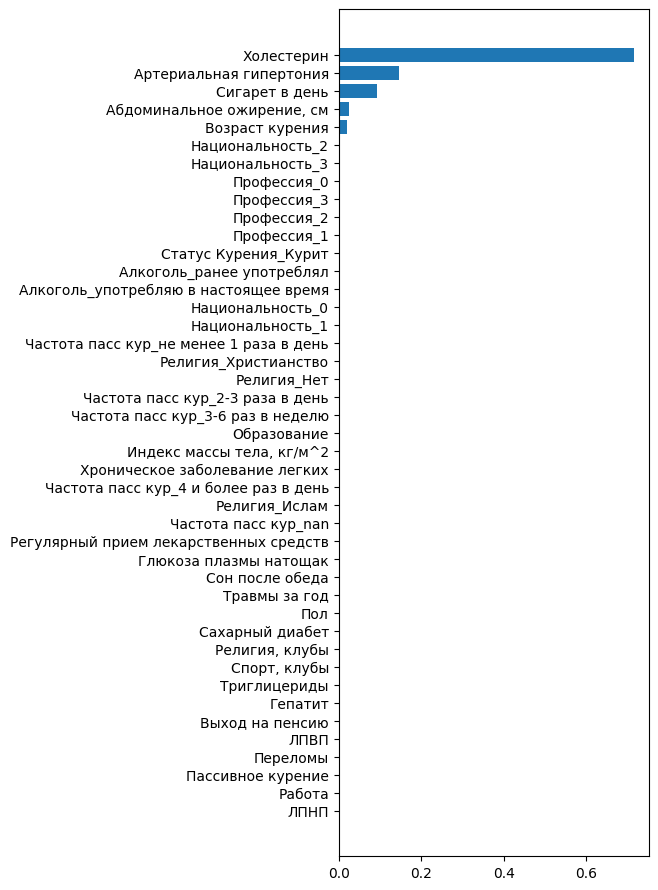

In [102]:
plot_imp(ssz, importance_dt)



---

